In [6]:
import h5py
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from skimage.segmentation import find_boundaries

In [7]:
# Read in the membrane segmentation
with open('./data/20210714masks_mem.npy', 'rb') as m:
    masks_mem = np.load(m)

In [8]:
cell_id = np.array(pd.read_csv("./result/crisprmap20210714sg2NEB_picklemax_cell_id_thresh6std_minusone.csv")).ravel()
cell_id

array([-1,  4,  2,  0,  6,  6,  9, -1, -1,  0,  8,  8, -1,  2,  4,  2,  9,
       -1,  6,  8,  8,  6,  6,  6,  8,  2,  1,  8,  2,  8,  7,  0,  9,  4,
        6,  6,  8,  8,  0,  6,  6,  0,  0,  5,  8,  9,  0,  0, -1,  6, -1,
        7,  0,  6,  9,  7,  7,  2,  7,  4,  2,  0,  2,  8,  8,  4,  8,  2,
        2,  6,  0,  5,  9,  5, -1,  6,  2, -1,  6,  0,  6, -1,  6,  8,  7,
        2, -1, -1, -1, -1,  5,  8,  5,  0,  0,  8,  5,  0,  4,  8,  5,  0,
        0,  8,  0,  8,  1, -1,  0,  0,  8,  2,  8,  8,  8,  8, -1,  2,  8,
        8,  2,  8, -1,  8,  4, -1,  0,  6,  2, -1,  0, -1,  4, -1,  1,  2,
        0, -1,  2, -1,  3,  5,  6, -1,  6, -1,  2,  2, -1,  5,  9,  3, -1,
       -1,  2,  2,  2,  9,  4, -1,  0,  3,  1,  1, -1,  8,  3,  9, -1, -1,
        4,  5,  3,  4,  3,  1,  2,  2, -1,  1,  3,  2,  9,  8,  4,  1, -1,
        9,  1,  8,  9,  8, -1,  3,  0,  2,  6, -1,  0,  0,  2, -1,  3, -1,
        0,  3,  7,  0,  3,  3,  8,  8, -1,  0,  0,  0,  0, -1,  3,  0,  5,
        1,  8,  0,  2,  2

In [5]:
set(cell_id)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
# plt.figure(dpi=300)
# plt.imshow(masks_mem)
# plt.axis('image')

In [9]:
mask = np.zeros(masks_mem.shape)
for i, l in enumerate(cell_id[1:]):
    mask[masks_mem==i+1] = l+1  # avoid label l being 0 because the background is 0
    # i+1 because index still starts with 0
#     print(i)
#     print(l)
    
# mask /= 10

In [6]:
np.unique(mask)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [7]:
# plt.figure(dpi=300)
# plt.imshow(mask)
# plt.axis('image')

In [10]:
color_dict = {
    0: (0,0,255),
    1: (0,255,0),
    2: (255, 0, 0),
    3: (0,255,255),
    4: (255,0,255),
    5: (255,255,0),
    6: (255,127,0),
    7: (0,127,0),
    8: (127,0,0),
    9: (255,255,255)
}

mask_color = np.zeros((*mask.shape, 3))
for i in range(len(color_dict)): 
    mask_color[mask==i+1] = color_dict[i]

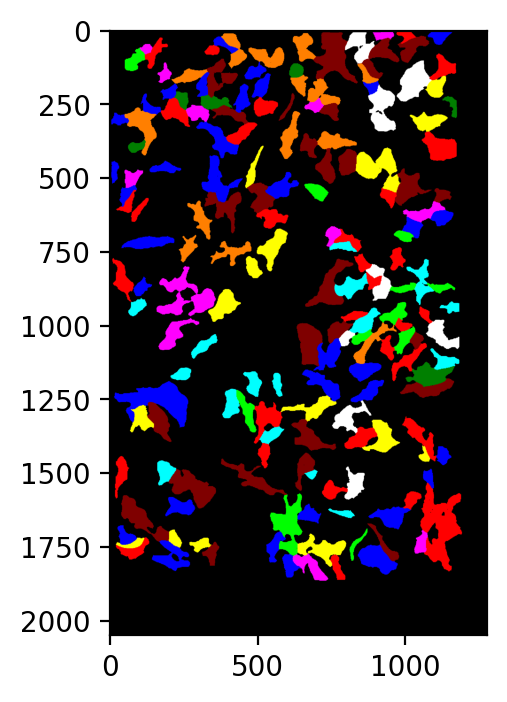

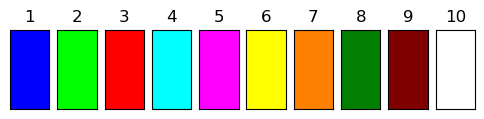

In [11]:
plt.figure(dpi=200)    
plt.imshow(mask_color.astype(np.uint8))

color_box = np.zeros((10, 5, 3))
plt.figure(dpi=100)  
for i in range(10): 
    plt.subplot(1, 10, i+1)
    color_box[:, :, :] = color_dict[i]
    plt.imshow(color_box.astype(np.uint8))
    plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
    plt.title(i+1)

## High quality cells

## Low quality cells